# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
%matplotlib inline


pd.options.display.max_columns = 50

In [2]:
data = pd.read_csv('/content/cleaned_investments_VC.csv', index_col=[0])

# Visualizations

## Class Imbalance

TypeError: countplot() got multiple values for argument 'data'

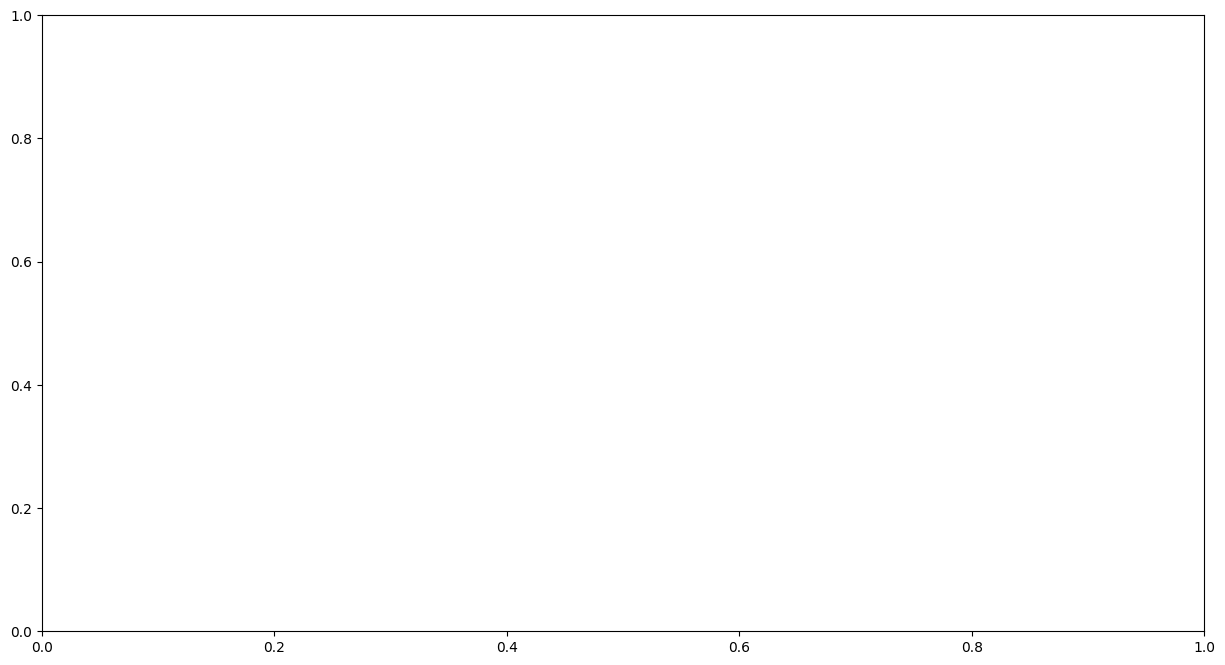

In [17]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot('target', data=data, palette='rocket')
sns.color_palette("rocket")
ax.set(xlabel='Target Variable', ylabel='Observation Count', title='Target Variable Class Imbalance', xticklabels=['not acquired(0)','acquired(1)'])

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

<ipython-input-18-19b73a921477>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=data, palette='rocket') # Changed 'target' to x='target'
<ipython-input-18-19b73a921477>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xlabel='Target Variable', ylabel='Observation Count', title='Target Variable Class Imbalance', xticklabels=['not acquired(0)','acquired(1)'])


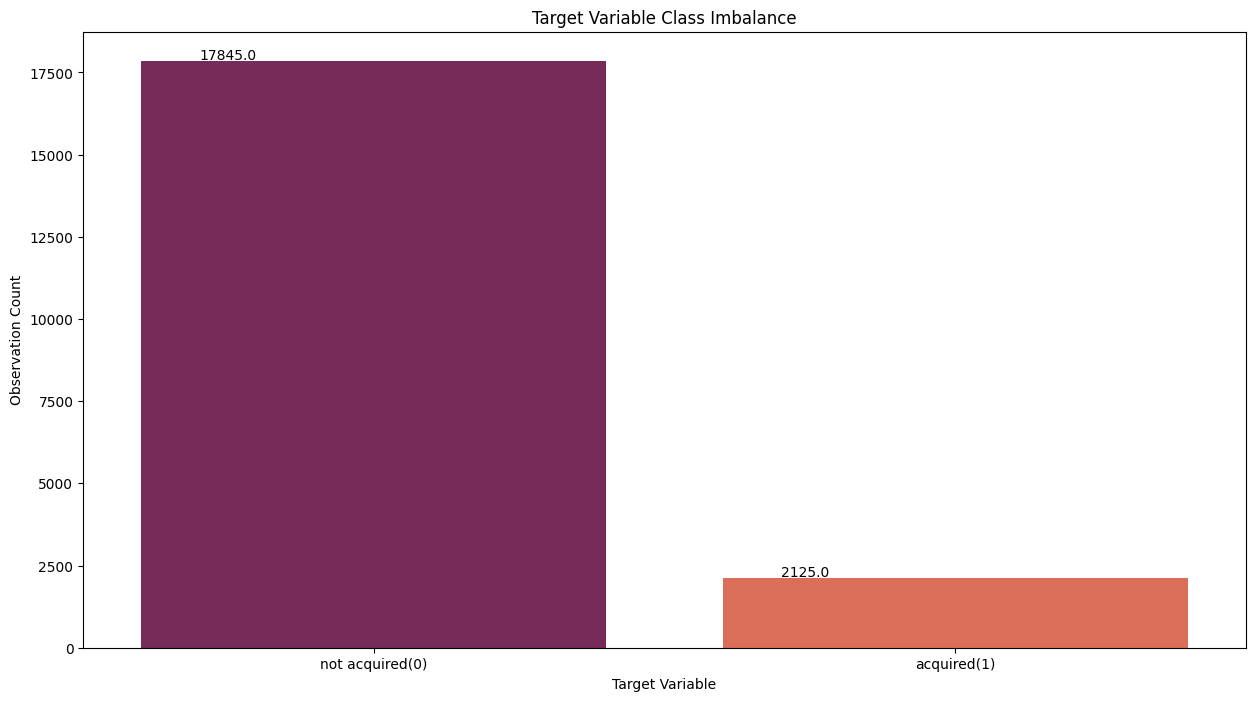

In [18]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x='target', data=data, palette='rocket') # Changed 'target' to x='target'
sns.color_palette("rocket")
ax.set(xlabel='Target Variable', ylabel='Observation Count', title='Target Variable Class Imbalance', xticklabels=['not acquired(0)','acquired(1)'])

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

## Category List

In [19]:
%store -r category_dummies

no stored variable or alias category_dummies


In [23]:
category_dummies.columns.to_list()

[]

In [22]:
category_dummies = category_dummies.drop(columns=['and','+'])
column_names = list(category_dummies.columns)
# category_dummies.columns.to_list()

KeyError: "['and', '+'] not found in axis"

In [ ]:
category_frequency_dict = []

for name in column_names:

    entry = {'frequency': category_dummies[name].sum(), 'category': name}
    category_frequency_dict.append(entry)

In [ ]:
sorted_dict = sorted(category_frequency_dict, key = lambda i: i['frequency'],reverse=True)

In [ ]:
graphing_dict = sorted_dict[:25]

In [ ]:
graphing_dict

In [ ]:
X_categories = []
y_frequencies = []
for num in range(0,25):
    values = list(graphing_dict[num].values())
    X_categories.append(values[1])
    y_frequencies.append(values[0])

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(X_categories, y_frequencies, palette='rocket')
ax.set(xlabel='Startup Category', ylabel='Frequency', title='Highest Frequency Startup Categories')
plt.xticks(rotation=45)
plt.show()

# Funding Sources for companies that were acquired.

In [ ]:
acquired = data.loc[data['target'] == 1]

In [ ]:
fund_types = ['seed', 'venture', 'other', 'debt_financing', 'angel', 'private_equity', 'round_A','round_B']


seed_total = acquired.seed.sum()
venture_total = acquired.venture.sum()
equity_total = acquired.equity_crowdfunding.sum()
undis = acquired.undisclosed.sum()
convertable = acquired.convertible_note.sum()
debt_financing = acquired.debt_financing.sum()
angel = acquired.angel.sum()
grant = acquired.grant.sum()
pe = acquired.private_equity.sum()
round_a = acquired.round_A.sum()
round_b = acquired.round_B.sum()

size = [seed_total, venture_total, convertable+equity_total+grant+undis, debt_financing, angel, pe, round_a, round_b]

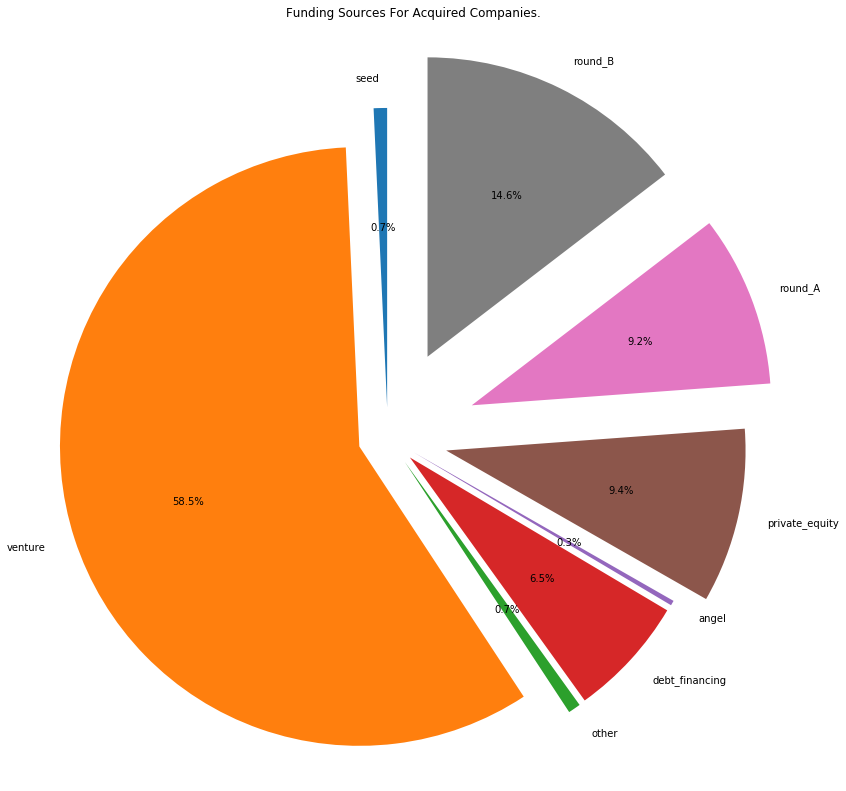

In [ ]:

explode = (.1, .1, .1,.1,.1,.2,.3,.3)

fig1, ax1 = plt.subplots(figsize=(14,14))
ax1.pie(size, labels=fund_types, autopct='%1.1f%%',
        shadow=False, startangle=90, explode=explode)
ax1.axis('equal')
plt.title('Funding Sources For Acquired Companies.', fontsize=12)
plt.show()

# Imports

In [24]:
import pandas as pd
pd.options.display.max_columns = 50

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
%matplotlib inline

data = pd.read_csv('/content/investments_VC.csv', encoding='iso-8859-1')
data.dropna(axis=0, how='all', inplace=True)

import warnings
warnings.simplefilter("ignore")

# Data Cleaning

In [25]:
data.columns = data.columns.str.replace(' ', '')

## Converting to proper datatypes

In [26]:
data[["founded_at"]] = data[["founded_at"]].apply(pd.to_datetime, errors='coerce')
data[["last_funding_at"]] = data[["last_funding_at"]].apply(pd.to_datetime, errors='coerce')
data[["founded_month"]] = data[["founded_month"]].apply(pd.to_datetime, errors='coerce')
data[["first_funding_at"]] = data[["first_funding_at"]].apply(pd.to_datetime, errors='coerce')

In [28]:
data['funding_total_usd'] = data['funding_total_usd'].str.replace(',', '')

## Dropping Observations with Null Values

In [29]:
data = data.dropna(subset=['founded_year',
                           'first_funding_at',
                           'founded_quarter',
                           'founded_month',
                           'founded_at',
                           'state_code',
                           'country_code',
                           'status',
                           'market'
                   ])

## Removing quarter from founding quarter

In [30]:
data['founded_quarter'] = data.founded_quarter.str.split('-').str[1]

## Removing null values from founded year

All observations have a founded_at value, but not all values have a founded_year value. Therefore, we will use founded_at to fill null values in founded_year

In [31]:
data['founded_year'] = pd.DatetimeIndex(data['founded_at']).year

## Turning Category List into Individual Columns

Turn each value into a list

In [32]:
data.category_list = data.category_list.astype(str)

Split the list on |

In [33]:
data.category_list = data.category_list.apply(lambda x: x.split('|'))

Reset index

In [34]:
data.reset_index(inplace = True, drop = True)

Strip whitespace from value lists

In [35]:
for i, item in enumerate(data.category_list):
    data.category_list[i] = [x.strip() for x in data.category_list[i] if x.strip()]

Making category list lowercase and splitting on spaces

In [36]:
for num in range(0, len(data.category_list)):
    data.category_list[num] = " ".join(data.category_list[num]).split()
    for i,elem in enumerate(data.category_list[num]):
        data.category_list[num][i] = data.category_list[num][i].lower()

Creating new dummy columns for category list

In [37]:
s = data.category_list

In [41]:
category_dummies = pd.get_dummies(s.apply(pd.Series).stack()).sum()

Concatonating dummy list with dataset

In [42]:
data = pd.concat([data,category_dummies], axis=1)

In [43]:
data.shape

(23971, 40)

# Feature Engineering

## Adding Domain name ending as a feature

In [44]:
#split on the domain after last .
end = data["homepage_url"].str.rsplit(".", n = 1, expand = True)
data['url_ending'] = end[1]
# data.url_ending = data['url_ending'].str.rstrip('/')

#remove backslash values in the endings
slashed_vals = data['url_ending'].str.rsplit("/", n = 3, expand = True)
data['url_ending'] = slashed_vals[0]

## New Feature: days_from_founding_to_funding

Difference btw founding and funding date

In [45]:
data['days_from_founding_to_funding'] = data['first_funding_at']-data['founded_at']

Changing datatype to int

In [48]:
data['days_from_founding_to_funding'] = data['days_from_founding_to_funding'].dt.days.astype('int16', errors='ignore')
data.funding_rounds = data.funding_rounds.astype(int, errors='ignore')

AttributeError: Can only use .dt accessor with datetimelike values

In [51]:
data.head(2)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,0,url_ending,days_from_founding_to_funding
0,/organization/waywire,#waywire,http://www.waywire.com,"[entertainment, politics, social, media, news]",News,1750000,acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06-01,Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,com,29.0
1,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,"[tourism, entertainment, games]",Tourism,60000,operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01-01,Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,228.0


## New Feature: time_between_first_and_last_funding

Time between first and last funding round

In [54]:
data['time_between_first_and_last_funding'] = data['last_funding_at']-data['first_funding_at']
data['time_between_first_and_last_funding'] = data['time_between_first_and_last_funding'].dt.days.astype('int16', errors='ignore')
data.time_between_first_and_last_funding = data.time_between_first_and_last_funding.astype(int, errors='ignore')

## Dummies

We are going to dummy the following categorical columns: market, country_code, state_code, funding_rounds, founded_year, url_ending

### Founding Month

Turn month integer into abbreviation of month name

In [55]:
data['founding_month'] = pd.DatetimeIndex(data['founded_month']).month
data['founding_month'] = data['founding_month'].fillna(0)
data.founding_month = data.founding_month.astype(int)
data['founding_month'] = data['founding_month'].apply(lambda x: calendar.month_abbr[x])

Create dummy columns for each month

In [56]:
month_dummies = pd.get_dummies(data.founding_month, prefix='month')
data = data.drop(columns = ['founded_month','founding_month'])
data = pd.concat([data,month_dummies], axis=1)
data = data.drop(columns = ['month_Jan'])

### Founded Quarter

In [57]:
founded_quarter_dummies = pd.get_dummies(data.founded_quarter, drop_first=True, prefix='founded_quarter')
data = data.drop(columns = 'founded_quarter')
data = pd.concat([data,founded_quarter_dummies], axis=1)

### Country Code

In [58]:
country_code_dummies = pd.get_dummies(data.country_code, drop_first=True, prefix='country_code')
data = data.drop(columns = 'country_code')
data = pd.concat([data,country_code_dummies], axis=1)

### State Code

In [59]:
state_code_dummies = pd.get_dummies(data.state_code, drop_first=True, prefix='state_code')
data = data.drop(columns = 'state_code')
data = pd.concat([data,state_code_dummies], axis=1)

### Founded Year

In [60]:
founded_year_dummies = pd.get_dummies(data.founded_year, drop_first=True, prefix='founded_year')
data = data.drop(columns = 'founded_year')
data = pd.concat([data,founded_year_dummies], axis=1)

### Url Ending

In [61]:
url_dict = data.url_ending.value_counts().to_dict()

In [62]:
names_list = []

for key,value in url_dict.items():

    if value >= 5:
        names_list.append(key)
    else:
        pass

In [63]:
data.url_ending = data.url_ending.apply(lambda x: x if x in names_list else 'other')

In [64]:
url_ending_dummies = pd.get_dummies(data.url_ending, drop_first=True, prefix='url_ending')
data = data.drop(columns = 'url_ending')
data = pd.concat([data,url_ending_dummies], axis=1)

# Dropping Columns

In [67]:
data = data.drop(columns=['homepage_url',
                          'permalink',
                          'name',
                          'market',
                          'region',
                          'city',
                          'post_ipo_equity',
                          'post_ipo_debt',
                          'secondary_market',
                          'product_crowdfunding',
                          'round_C',
                          'round_D',
                          'round_E',
                          'round_F',
                          'round_G',
                          'round_H',
                          'category_list',
                          'founded_at',
                          'last_funding_at',
                          'funding_rounds',
                          'first_funding_at'

])

In [68]:
data.columns.to_list()

['funding_total_usd',
 'status',
 'seed',
 'venture',
 'equity_crowdfunding',
 'undisclosed',
 'convertible_note',
 'debt_financing',
 'angel',
 'grant',
 'private_equity',
 'round_A',
 'round_B',
 0,
 'days_from_founding_to_funding',
 'time_between_first_and_last_funding',
 'month_',
 'month_Apr',
 'month_Aug',
 'month_Dec',
 'month_Feb',
 'month_Jul',
 'month_Jun',
 'month_Mar',
 'month_May',
 'month_Nov',
 'month_Oct',
 'month_Sep',
 'founded_quarter_Q2',
 'founded_quarter_Q3',
 'founded_quarter_Q4',
 'country_code_USA',
 'state_code_AK',
 'state_code_AL',
 'state_code_AR',
 'state_code_AZ',
 'state_code_BC',
 'state_code_CA',
 'state_code_CO',
 'state_code_CT',
 'state_code_DC',
 'state_code_DE',
 'state_code_FL',
 'state_code_GA',
 'state_code_HI',
 'state_code_IA',
 'state_code_ID',
 'state_code_IL',
 'state_code_IN',
 'state_code_KS',
 'state_code_KY',
 'state_code_LA',
 'state_code_MA',
 'state_code_MB',
 'state_code_MD',
 'state_code_ME',
 'state_code_MI',
 'state_code_MN',
 '

# DataFrame to CSV

In [69]:
data = data.loc[data['funding_total_usd'] != ' -   ']

In [70]:
status = []

for val in data['status']:
    if val == 'acquired':
        status.append(1)
    elif val == 'operating':
        status.append(0)
    else:
        status.append(0)
data['target'] = status

data.drop(['status'], axis=1, inplace=True)

In [72]:
data.funding_total_usd = data['funding_total_usd'].astype(int, errors='ignore')

In [75]:
data.to_csv('/content/cleaned_investments_VC.csv')

In [74]:
data.target.value_counts()

,count
target,
0,18578
1,2125


# Imports

In [76]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100

import sklearn
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import TomekLinks

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import metrics

from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import confusion_matrix

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [78]:
data = pd.read_csv('/content/cleaned_investments_VC.csv', index_col=[0])

# Scaling

Scaling continous variable columns in the dataset

In [79]:
# Creating instance of scaler
scaler = StandardScaler()

# Creating list of columns with continuous variables to be scaled
columns_to_scale = ['funding_total_usd',
                    'seed',
                    'venture',
                    'equity_crowdfunding',
                    'undisclosed',
                    'convertible_note',
                    'debt_financing',
                    'angel',
                    'grant',
                    'private_equity',
                    'round_A',
                    'round_B',
                    'days_from_founding_to_funding',
                    'time_between_first_and_last_funding']

# Scaling continuous variable columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Test Train Split for Modeling

In [80]:
# Splitting dataset into train and test sets
train, test = train_test_split(data, test_size=0.2, random_state = 42)

# Creating X,y for train
X_train = train.drop(columns = 'target')
y_train = train.target

# Creating X,y for test
X_test = test.drop(columns = 'target')
y_test = test.target

# Baseline Model

### Fitting and Predicting

In [86]:
!pip install scikit-learn
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame

# Splitting dataset into train and test sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Creating X,y for train
X_train = train.drop(columns='target')
y_train = train.target

# Creating X,y for test
X_test = test.drop(columns='target')
y_test = test.target

# Create an imputer to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'

# Fit the imputer on the training data and transform both train and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test) #apply same transformation to test set

# Creating instance of Logistic Regression for baseline model
base_logreg = LogisticRegression(random_state=42, max_iter=10**4)

# Fitting baseline model
base_logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [81]:
# Creating instance of Logistic Regression for baseline model
base_logreg = LogisticRegression(random_state=42, max_iter= 10**4)

In [84]:
# Fitting baseline model
base_logreg.fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Evaluating

#### Train Set

In [87]:
# Predicting on train set
y_base_log_train_preds = base_logreg.predict(X_train)

# Testing target variables prediction against real for training set
print(classification_report(y_train, y_base_log_train_preds))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     14883
           1       0.41      0.02      0.03      1679

    accuracy                           0.90     16562
   macro avg       0.65      0.51      0.49     16562
weighted avg       0.85      0.90      0.85     16562



In [88]:
# Creating confusion matrix for y_train and y_base_preds_train
confusion_matrix(y_train, y_base_log_train_preds)

array([[14845,    38],
       [ 1653,    26]])

#### Test Set

In [89]:
# Predicting on test set
y_base_log_test_preds = base_logreg.predict(X_test)

# Testing target variables prediction against real for test set
print(classification_report(y_test, y_base_log_test_preds))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3695
           1       0.58      0.02      0.05       446

    accuracy                           0.89      4141
   macro avg       0.74      0.51      0.50      4141
weighted avg       0.86      0.89      0.85      4141



In [90]:
# Creating confusion matrix for y_test and y_base_preds_test
confusion_matrix(y_test, y_base_log_test_preds)

array([[3687,    8],
       [ 435,   11]])

# Modelling with Downsampling

## Dealing With Class Imbalance

In [91]:
# Subsetting observation with target variable value 1
acquired_down = train[train.target ==1]

# Subsetting observation with target variable value 0
not_acquired_down = train[train.target ==0]

In [93]:
# Downsampling majority class (0) with replacement to be equal to minority class (1)
not_acquired_downsampled = resample(not_acquired_down, # Changed 'not_acquired' to 'not_acquired_down'
                                replace = True,
                                n_samples = (len(acquired_down)), # Changed 'acquired' to 'acquired_down' for consistency
                                random_state = 23)

In [92]:
# Downsampling majority class (0) with replacement to be equal to minority class (1)
not_acquired_downsampled = resample(not_acquired,
                                replace = True,
                                n_samples = (len(acquired)),
                                random_state = 23)

NameError: name 'not_acquired' is not defined

In [94]:
# Creating new downsampled dataset df_down
df_down = pd.concat([acquired_down, not_acquired_downsampled])

In [95]:
# Showing new balanced value counts for target variable
df_down.target.value_counts()

,count
target,
1,1679
0,1679


In [96]:
# Creating new X for downsampled model training
X_down = df_down.drop(columns='target')

# Creating new X for downsampled model training
y_down = df_down.target

## Logistic Regression

### Fitting Model

In [97]:
# Creating new instance of Logistic Regression model
logReg = LogisticRegression(class_weight = 'balanced',
                            C=0.01,
                            solver='saga',
                            penalty='elasticnet',
                            max_iter=2000,
                            l1_ratio=1.0
                            )


In [100]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Creating new X for downsampled model training
X_down = df_down.drop(columns='target')

# Creating new X for downsampled model training
y_down = df_down.target

# Creating new instance of Logistic Regression model
logReg = LogisticRegression(class_weight = 'balanced',
                            C=0.01,
                            solver='saga',
                            penalty='elasticnet',
                            max_iter=2000,
                            l1_ratio=1.0
                            )

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean') # You can change strategy to 'median' or 'most_frequent'

# Fit the imputer on your data and transform it
X_down_imputed = imputer.fit_transform(X_down)

# Fitting downsampled dataset df_down to model for training
logReg.fit(X_down_imputed, y_down) # Use the imputed data for training

LogisticRegression(C=0.01, class_weight='balanced', l1_ratio=1.0, max_iter=2000,
                   penalty='elasticnet', solver='saga')

In [98]:
# Fitting downsampled dataset df_down to model for training
logReg.fit(X_down, y_down)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Evaluating Model

#### Train Set

In [102]:
# Using trained model to predict on downsampled train set
y_down_log_train_preds = logReg.predict(X_down_imputed)

# Testing target variables prediction against real for train set
print(classification_report(y_down, y_down_log_train_preds))

              precision    recall  f1-score   support

           0       0.57      0.68      0.62      1679
           1       0.60      0.48      0.53      1679

    accuracy                           0.58      3358
   macro avg       0.58      0.58      0.58      3358
weighted avg       0.58      0.58      0.58      3358



In [103]:
# Creating confusion matrix for y_down and y_down_pred_train
confusion_matrix(y_down, y_down_log_train_preds)

array([[1145,  534],
       [ 876,  803]])

#### Testing Set

In [104]:
# Using trained model to predict on downsampled test set
y_down_log_test_preds = logReg.predict(X_test)

# Testing target variables prediction against real for test set
print(classification_report(y_test, y_down_log_test_preds))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79      3695
           1       0.16      0.48      0.24       446

    accuracy                           0.67      4141
   macro avg       0.54      0.59      0.51      4141
weighted avg       0.84      0.67      0.73      4141



In [105]:
# Creating confusion matrix for y_test and y_down_pred_test
confusion_matrix(y_test, y_down_log_test_preds)

array([[2567, 1128],
       [ 233,  213]])

## GridSearch Logistic Regression

### Fitting Model

In [106]:
# Creating parameter grid for GridSearch
param_grid_down = {
    'solver': ['saga'],
    'C':[.3, .5],
    'penalty':['elasticnet'],
    'max_iter':[200, 1000],
    'l1_ratio':[.2, 1.0]
               }

In [107]:
# Creating instance of GridSearch for logistic regression including param_grid_down
grid_tree=GridSearchCV(LogisticRegression(), param_grid_down, verbose=1, n_jobs=-1)

In [109]:
# Fitting downsampled training data to GridSearch instance
grid_tree.fit(X_down_imputed, y_down)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.3, 0.5], 'l1_ratio': [0.2, 1.0],
                         'max_iter': [200, 1000], 'penalty': ['elasticnet'],
                         'solver': ['saga']},
             verbose=1)

### Evaluating Model

#### Train Set

In [111]:
# Using trained model to predict on downsampled train set
y_down_grid_train_preds = grid_tree.best_estimator_.predict(X_down_imputed)

In [112]:
# Testing target variables prediction against real for train set
print(classification_report(y_down, y_down_grid_train_preds))

              precision    recall  f1-score   support

           0       0.60      0.73      0.66      1679
           1       0.66      0.52      0.58      1679

    accuracy                           0.62      3358
   macro avg       0.63      0.62      0.62      3358
weighted avg       0.63      0.62      0.62      3358



In [113]:
# Creating confusion matrix for y_down and y_down_grid_train_preds
confusion_matrix(y_down, y_down_grid_train_preds)

array([[1226,  453],
       [ 814,  865]])

#### Test Set

In [114]:
# Using trained model to predict on downsampled test set
y_down_grid_test_preds = grid_tree.best_estimator_.predict(X_test)

In [115]:
# Testing target variables prediction against real for test set
print(classification_report(y_test, y_down_grid_test_preds))

              precision    recall  f1-score   support

           0       0.93      0.68      0.78      3695
           1       0.18      0.57      0.27       446

    accuracy                           0.67      4141
   macro avg       0.55      0.62      0.53      4141
weighted avg       0.85      0.67      0.73      4141



In [117]:
# Creating confusion matrix for y_down and y_down_grid_test_preds
confusion_matrix(y_test, y_down_grid_test_preds)

array([[2503, 1192],
       [ 193,  253]])

In [118]:
# Setting and testing thresholds to maximize precision score
THRESHOLD_down = 0.3
y_pred_prob = grid_tree.predict_proba(X_test)[:, 1]
y_pred_class = np.where(y_pred_prob > THRESHOLD_down, 1, 0)

# Modelling with Downsampling and Upsampling

## Dealing With Class Imbalance

### Upsampling Acquired

In [119]:
# Subsetting observation with target variable value 1
acquired_up = train[train.target == 1]

# Subsetting observation with target variable value 0
not_acquired_up = train[train.target == 0]

In [120]:
# Upsampling minority class (1) with replacement to be equal to 5000 observations
acquired_upsampled = resample(acquired_up,
                              replace=True,
                              n_samples=5000,
                              random_state=42)

In [121]:
# Creating new upsampled dataset df_up
df_up = pd.concat([not_acquired_up, acquired_upsampled])

### Downsampling Not Acquired

#### Resample

In [123]:
# Creating new upsampled dataset df_up
df_up = pd.concat([not_acquired_up, acquired_upsampled])

# Subsetting observation with target variable value 0
# Replacing upsampled_data with df_up, assuming df_up is the upsampled dataset
not_acquired_up_down = df_up[df_up.target == 0]

# Subsetting observation with target variable value 1
# Replacing upsampled_data with df_up, assuming df_up is the upsampled dataset
acquired_up_down = df_up[df_up.target == 1]

In [122]:
# Subsetting observation with target variable value 0
not_acquired_up_down = upsampled_data[upsampled_data.target == 0]

# Subsetting observation with target variable value 1
acquired_up_down = upsampled_data[upsampled_data.target == 1]

NameError: name 'upsampled_data' is not defined

In [124]:
# Downsampling majority class (0) with replacement to be equal to 10000 observations
not_acquired_downsampled = resample(not_acquired_up_down,
                                 replace=True,
                                 n_samples=10000,
                                 random_state=42)

In [125]:
# Creating new upsampled and downsampled dataset df_up_down
df_up_down = pd.concat([acquired_up_down, not_acquired_downsampled])

#### Tomek Links

In [126]:
# Creating X,y from df_up_down to use for Tomek Links
X_up_down = df_up_down.drop('target', axis=1)
y_up_down = df_up_down['target']

In [127]:
# Fitting Tomek Links to df_up_down
X_links, y_links = TomekLinks().fit_resample(X_train, y_train)

## Logistc Regression using GridSearch

### Fitting Model

In [128]:
# Creating new instance of Logistic Regression model
lr_links = LogisticRegression()

In [129]:
# Creating parameter grid for GridSearch
param_grid_links_lr = {

    'class_weight': [None,'balanced'],
    'solver': ['liblinear','sag','saga'],
    'max_iter': list(range(100,1000,25))
}

In [130]:
# Creating instance of GridSearch for logistic regression including param_grid_links_lr
lr_links_grid = RandomizedSearchCV(lr_links,
                             param_grid_links_lr,
                             scoring='precision',
                             n_jobs=-1,
                             verbose=2)

In [131]:
# Fitting up and downsampled training data to GridSearch instance
lr_links_grid.fit(X_links, y_links)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'max_iter': [100, 125, 150, 175, 200,
                                                     225, 250, 275, 300, 325,
                                                     350, 375, 400, 425, 450,
                                                     475, 500, 525, 550, 575,
                                                     600, 625, 650, 675, 700,
                                                     725, 750, 775, 800, 825, ...],
                                        'solver': ['liblinear', 'sag', 'saga']},
                   scoring='precision', verbose=2)

### Evaluating Model

#### Train Set

In [132]:
# Using trained model to predict on up and downsampled train set
y_links_grid_train_preds = lr_links_grid.predict(X_links)

In [133]:
# Testing target variables prediction against real for train set
print(classification_report(y_links, y_links_grid_train_preds))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94     14299
           1       0.49      0.03      0.05      1679

    accuracy                           0.89     15978
   macro avg       0.69      0.51      0.50     15978
weighted avg       0.85      0.89      0.85     15978



In [134]:
# Creating confusion matrix for y_test and y_links_grid_test_preds
confusion_matrix(y_links, y_links_grid_train_preds)

array([[14252,    47],
       [ 1634,    45]])

#### Test Set

In [135]:
# Using trained model to predict on up and downsampled test set
y_links_grid_test_preds = lr_links_grid.predict(X_test)

In [136]:
# Testing target variables prediction against real for test set
print(classification_report(y_test, y_links_grid_test_preds))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94      3695
           1       0.50      0.03      0.06       446

    accuracy                           0.89      4141
   macro avg       0.70      0.51      0.50      4141
weighted avg       0.85      0.89      0.85      4141



In [137]:
# Creating confusion matrix for y_test and y_links_grid_test_preds
confusion_matrix(y_test, y_links_grid_test_preds)

array([[3680,   15],
       [ 431,   15]])

In [138]:
THRESHOLD = 0.95
thesh_preds = np.where(lr.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

NameError: name 'lr' is not defined

## Random Forest 1

### Fitting Model

In [ ]:
# Creating new instance of Random Forest model
rf_links = RandomForestClassifier(n_jobs=-1)

In [ ]:
# Creating parameter grid for Randomized Search
param_grid_links_rf = {
    'n_estimators': [100,200,300],
    'criterion': ['gini','entropy'],
    'max_depth': list(range(5,7)),
    'max_features': list(range(100,1000,100)),
    'min_samples_leaf': [1,2,3,4,5]
}

In [ ]:
# Creating instance of Randomized Search for Random Forest including param_grid_links_rf
grid_tree_rf = RandomizedSearchCV(rf_links,
                                  param_grid_links_rf,
                                  cv=5,
                                  verbose=1,
                                  n_jobs=-1,
                                  scoring='precision_micro'
)

In [ ]:
# Fitting up and downsampled training data to GridSearch instance
grid_tree_rf.fit(X_links, y_links)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 6],
                                        'max_features': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300]},
                   scoring='precision_micro', verbose=1)

### Evaluating Model

#### Train Set

In [ ]:
# Using trained model to predict on up and downsampled train set
y_links_rand_train_preds = lr_links_grid.predict(X_links)

In [ ]:
# Testing target variables prediction against real for train set
print(classification_report(y_links, y_links_rand_train_preds))

In [ ]:
# Creating confusion matrix for y_links and y_links_rand_train_preds
confusion_matrix(y_links, y_links_rand_train_preds)

#### Test Set

In [ ]:
# Using trained model to predict on up and downsampled test set
y_links_rand_test_preds = lr_links_grid.predict(X_test)

In [ ]:
# Testing target variables prediction against real for test set
print(classification_report(y_test, y_links_rand_test_preds))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78      1954
           1       0.49      0.08      0.14      1046

    accuracy                           0.65      3000
   macro avg       0.58      0.52      0.46      3000
weighted avg       0.60      0.65      0.56      3000



In [ ]:
# Creating confusion matrix for y_test and y_links_rand_test_preds
confusion_matrix(y_test, y_links_rand_test_preds)

## Random Forest 2

### Fitting Model

In [ ]:
# Creating new instance of Random Forest model updated with finding from first iteration
rf_links_2 = RandomForestClassifier(n_jobs=-1, min_samples_leaf = 1, criterion = 'entropy')

In [ ]:
# Creating parameter grid for Random Search
param_grid_links_rf_2 = {
    'n_estimators': list(range(150,800, 50)),
    'max_depth': list(range(3,8)),
    'max_features': list(range(200,600,25)),
}

In [ ]:
# Creating instance of Random Search for Random Forest including param_grid_links_rf_2
grid_tree_rf_2 = RandomizedSearchCV(rf_links_2,
                                  param_grid_links_rf_2,
                                  cv=10,
                                  verbose=2,
                                  n_jobs=-1,
                                  scoring='precision'
)

In [ ]:
# Fitting up and downsampled training data to Random Search instance
grid_tree_rf_2.fit(X_links, y_links)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 15.1min finished


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    n_jobs=-1),
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': [200, 225, 250, 275,
                                                         300, 325, 350, 375,
                                                         400, 425, 450, 475,
                                                         500, 525, 550, 575],
                                        'n_estimators': [150, 200, 250, 300,
                                                         350, 400, 450, 500,
                                                         550, 600, 650, 700,
                                                         750]},
                   scoring='precision', verbose=2)

### Evaluating Model

#### Train Set

In [ ]:
# Using trained model to predict on up and downsampled train set
y_links_rand_2_train_preds = lr_links_grid.predict(X_links)

In [ ]:
# Testing target variables prediction against real for train set
print(classification_report(y_links, y_links_rand_2_train_preds))

In [ ]:
# Creating confusion matrix for y_links and y_links_rand_2_train_preds
confusion_matrix(y_links, y_links_rand_2_train_preds)

#### Test Set

In [ ]:
# Using trained model to predict on up and downsampled test set
y_links_rand_2_test_preds = lr_links_grid.predict(X_test)

In [ ]:
# Testing target variables prediction against real for test set
print(classification_report(y_test, y_links_rand_2_test_preds))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1954
           1       0.00      0.00      0.00      1046

    accuracy                           0.65      3000
   macro avg       0.33      0.50      0.39      3000
weighted avg       0.42      0.65      0.51      3000



In [ ]:
# Creating confusion matrix for y_test and y_links_rand_2_test_preds
confusion_matrix(y_test, y_links_rand_2_test_preds)